<h1>The heterogeneity and robustness of the Kuznets curve

https://docs.google.com/document/d/1M99QQbTWXdMceAiBRSqCsgX0dTrR9O3X50fAD2F2QrA/edit

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis
import arch.unitroot as ur

In [17]:
df = pd.read_csv('canada.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^\\w\\s]','')
df = df.rename(columns={'time' : 'year', 'gdp_per_capita_(current_us$)_[ny.gdp.pcap.cd]' : 'gdp', 'co2_emissions_(metric_tons_per_capita)_[en.atm.co2e.pc]' : 'co2', 'gini_index_[si.pov.gini]' : 'gini'})
df = df.replace('..', np.nan).dropna()

cols = ['gdp', 'co2', 'gini']
for col in cols:
    df[col] = pd.to_numeric(df[col])

data_skewness = skew(df)
data_kurtosis = kurtosis(df)

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

for col in cols:
    df[col] = np.log(df[col])

df.describe()

Skewness: [ 0.          0.12082244  0.28754523 -0.72091652]
Kurtosis: [-1.20266963 -1.66482441 -0.78626082 -0.87640102]


,year,gdp,co2,gini
count,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,10.381585,2.765871,3.496157
std,8.803408,0.373290,0.045451,0.027032
min,1990.000000,9.903369,2.688752,3.443618
25%,1997.250000,9.992435,2.737120,3.482774
50%,2004.500000,10.439907,2.761127,3.504054
75%,2011.750000,10.737696,2.803490,3.516755
max,2019.000000,10.871784,2.855356,3.529297


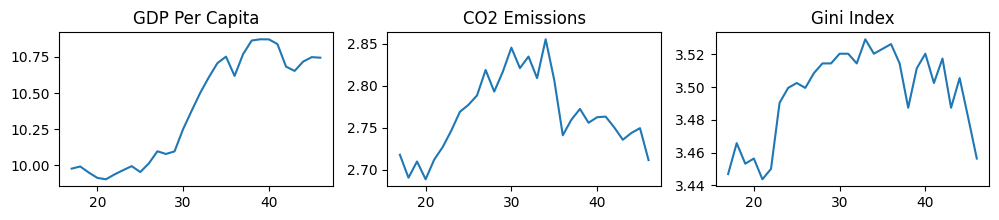

In [28]:
fig, ax = plt.subplots(1, 3, figsize = (12,2))
ax[0].plot(df['gdp'])
ax[0].set_title("GDP Per Capita")
ax[1].plot(df['co2'])
ax[1].set_title("CO2 Emissions")
ax[2].plot(df['gini'])
ax[2].set_title("Gini Index")
plt.show()

<h1>Kuznets Curve

In [4]:
df['year_group'] = df['year'] // 3 * 3
avr_df = df.groupby('year_group')[['gdp','co2', 'gini']].mean().reset_index()

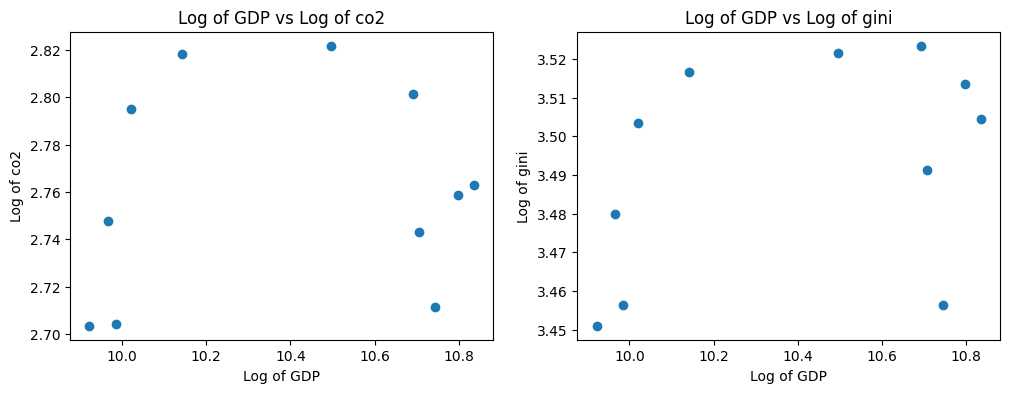

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))

ax[0].scatter(avr_df['gdp'], avr_df[cols[1]])
ax[0].set_xlabel('Log of GDP')
ax[0].set_ylabel(f'Log of {cols[1]}')
ax[0].set_title(f'Log of GDP vs Log of {cols[1]}')

ax[1].scatter(avr_df['gdp'], avr_df[cols[2]])
ax[1].set_xlabel('Log of GDP')
ax[1].set_ylabel(f'Log of {cols[2]}')
ax[1].set_title(f'Log of GDP vs Log of {cols[2]}')

plt.show()

#to be used to compare two countries kuznets curves on the same chart
#for i in range(2):
#    plt.scatter(avr_df['gdp'], avr_df[cols[i+1]])
#    plt.xlabel('Log of GDP')
#    plt.ylabel(f'Log of {cols[i+1]}')
#    plt.title(f'Log of GDP vs Log of {cols[i+1]}')
#    plt.show()

<h1>Stationary and Non-stationary test

In [31]:
for col in cols:
    series = df[col].values
    adf_y = ur.ADF(series)
    print(f'\n///////////////////{col}///////////////////////')
    print(adf_y.summary())


///////////////////gdp///////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.637
P-value                         0.862
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

///////////////////co2///////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.526
P-value                         0.521
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

///////////////////gini///////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.916
P-value                         0.325
Lags  

c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

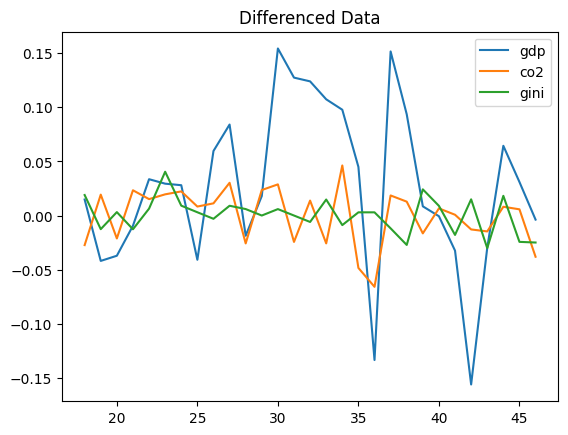

In [7]:
df_diff = df[cols].diff()
df_diff.plot()
plt.title('Differenced Data')
plt.show()

<h1>ACF and PACF

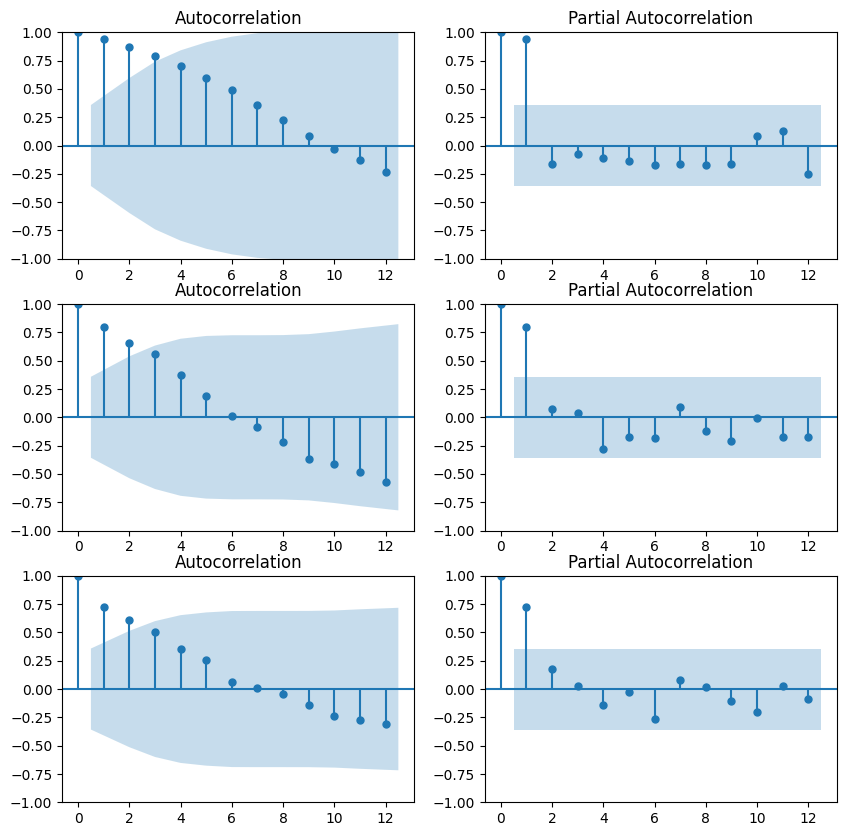

In [8]:
x = df['gdp'].values
y = df['co2'].values
z = df['gini'].values

fig, ax = plt.subplots(3, 2, figsize = (10,10))
sm.graphics.tsa.plot_acf(x, lags=12, ax=ax[0, 0])
sm.graphics.tsa.plot_pacf(x, lags=12, ax=ax[0, 1])
sm.graphics.tsa.plot_acf(y, lags=12, ax=ax[1, 0])
sm.graphics.tsa.plot_pacf(y, lags=12, ax=ax[1, 1])
sm.graphics.tsa.plot_acf(z, lags=12, ax=ax[2, 0])
sm.graphics.tsa.plot_pacf(z, lags=12, ax=ax[2, 1])
plt.show()

<h1>ARIMA, AIC and BIC

In [9]:
for i in range(1,4):
    for j in range(1,4):
        model = ARIMA(y, order=(i, 0, j))
        model_fit = model.fit()
        aic = model_fit.aic
        bic = model_fit.bic

        print(f'ARIMA {i}, 0, {j}')
        print(f"AIC: {aic}")
        print(f"BIC: {bic}")
        print(f'ARIMA: {model_fit.params}')
        print()


ARIMA 1, 0, 1
AIC: -128.09061156497052
BIC: -122.4858220383219
ARIMA: [ 2.74930966e+00  8.83055005e-01 -1.47386604e-01  6.01243935e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 1, 0, 2
AIC: -126.13754829554767
BIC: -119.1315613872369
ARIMA: [ 2.74946268e+00  8.80100394e-01 -1.76725599e-01  4.66508987e-02
  6.00020232e-04]

ARIMA 1, 0, 3
AIC: -127.17246742175382
BIC: -118.76528313178089
ARIMA: [ 2.75478180e+00  8.09518716e-01 -1.41091740e-01 -2.39952406e-03
  3.84981109e-01  5.33714896e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 1
AIC: -126.0992474762385
BIC: -119.09326056792773
ARIMA: [ 2.74930475e+00  8.25353521e-01  5.06693269e-02 -9.61434191e-02
  6.01025690e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 2
AIC: -133.0539343963118
BIC: -124.64675010633887
ARIMA: [ 2.77273347e+00  1.93053136e+00 -9.89071738e-01 -1.72948257e+00
  7.41190660e-01  3.77921546e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 3
AIC: -126.59961164367644
BIC: -116.79122997204135
ARIMA: [ 2.76413801e+00  1.88777342e+00 -9.28889505e-01 -1.38972441e+00
  5.17751466e-01  2.08280215e-02  4.94200564e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA 3, 0, 1
AIC: -125.92625304330213
BIC: -117.5190687533292
ARIMA: [ 2.75026234e+00 -1.63576285e-01  7.04902418e-01  2.07518423e-01
  9.86430834e-01  5.39414113e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 3, 0, 2
AIC: -122.7388595701349
BIC: -112.93047789849982
ARIMA: [2.74859897e+00 1.86556581e-01 3.44556357e-01 2.60719864e-01
 5.52084561e-01 8.40124085e-02 5.87801290e-04]

ARIMA 3, 0, 3
AIC: -130.1910903592172
BIC: -118.98151130591997
ARIMA: [ 2.77245176e+00  1.03033200e+00  7.63571839e-01 -9.02164250e-01
 -8.71136628e-01 -9.80048409e-01  8.71607243e-01  3.32435825e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


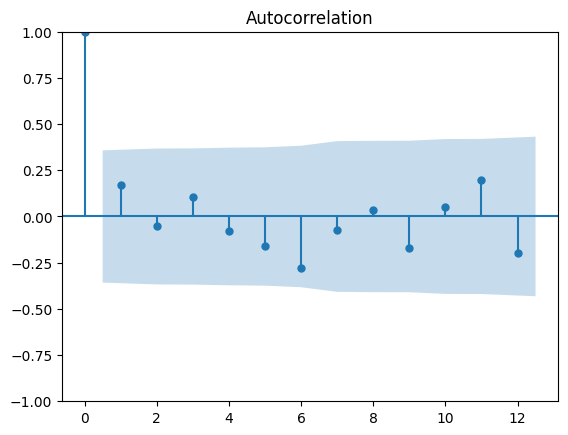

In [10]:
# Check the residuals
residuals = model_fit.resid
sm.graphics.tsa.plot_acf(residuals, lags=12)  # adjust the number of lags here
plt.show()

<h1>OLS

In [11]:
y = df['gini']
x = df['gdp']
z = df['co2']

x = sm.add_constant(x)
x["gdp2"] = x["gdp"]**2
ols_model = sm.OLS(y, x).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     12.20
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           0.000168
Time:                        10:38:20   Log-Likelihood:                 75.917
No. Observations:                  30   AIC:                            -145.8
Df Residuals:                      27   BIC:                            -141.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4650      5.861     -2.980      0.0

In [12]:
import statsmodels.api as sm
gmm_model = sm.GMM(y, x, ols_model.params)

print(gmm_model.fit().summary())

AttributeError: module 'statsmodels.api' has no attribute 'GMM'